## Class : Intro to ML, Linear Regression

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. $\underline{{\rm ML\ packages}}$
In this course we will be using scickit-learn, the machine learning library made for python. Scikit-learn has many built-in useful functions that does most of the things we need for a successful ML algorithm.

## 1.1 Import the scikit-learn functions we may need
For machine learning, some functions we may forsee needeing are :
- the model (the ML algorithm that does the fitting)
- a data splitter (to make training and test sets)
- a function that does KFold
- a function that does cross-validation
- a module that contains evaluation estimators

Let's import all of those so we can call them if/when we need them

In [ ]:
### NOTICE HOW THE SCIKIT_LEARN PACKAGE IS SPELLED
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn import metrics

## 1.2 Fitting the regression directly when we don't want to predict unknown instances, we only want to model a particular dataset
We're going to first do the linear regression directly on an example where we don't have many data points. Again, for a good ML problem, we want a statistical sample, but sometimes we have to work with small datasets.

Let's start, as usual, by making a toy example.

In [ ]:
#let's make an array of x-values from 0-50 and y-values with some scatter

#let's make a random seed so we get the same scatter every time
np.random.seed(0)

span = 50
x = np.arange(span)

#notice that we want some larger scatter here,
#the more points we have, the larger we need to scale the random values
y_true = 2.5+x*3 + span/5*np.random.randn(span)

Text(0, 0.5, 'hypothetical unit')

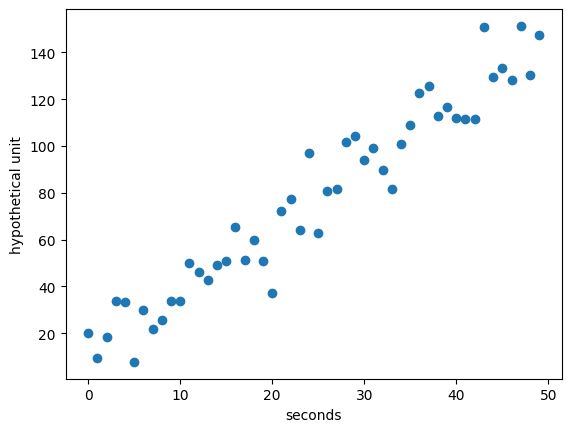

In [ ]:
#let's make a scatter plot
#give our x-axis units of time in seconds
#our y-axis can be "hypothetical units"
plt.scatter(x, y_true)
plt.xlabel('seconds')
plt.ylabel('hypothetical unit')

Again, let's PRETEND WE DIDNT MAKE THIS OURSELVES

In [ ]:
x.shape

(50,)

In [ ]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

We see that we have less than 100 datapoints, this doesn't make for the best ML problem, but with linear regression we can fit the entire data. It simply does everything we did by hand yesterday, but it does it "under the hood"

Let's fit the data.

We will use the sklearn LinearRegression() function. The function uses the Ordinary Least Squares (OLS), which means that it minimizes the sum of the square of the differences, in order to find the best fit.

Our LinearRegression() function reads the predictor variable (x) as a 2D array. So when our predictor variable only has 1D, we need to use .reshape(-1,1) to turn it into 2D

In [ ]:
# now our shape will read as if it is 2-dimensional

### DESCRIBE HOW THE OUTPUT CHANGED
x_2 = x.reshape(-1,1)
x_2.shape

(50, 1)

In [ ]:
x_2

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49]])

In [ ]:
### LET'S DESCRIBE THE SYNTAX OF THE NEXT FEW CELLS TOGETHER!

### Notice I run this alone in it's own cell! why??
model_1 = LinearRegression()

In [ ]:
#we fit the model with the x_2 and y values
model_1.fit(x_2,y_true)


LinearRegression()

No we can use the attributes "coef_", "intercept_" from the fitted model to get the coeficient (slope) and intercept

In [ ]:
slope_1     = model_1.coef_
intercept_1 = model_1.intercept_

print(slope_1, intercept_1)

[2.71191378] 10.963705188081946


and now leet's create a new line with the parameters from the regression model, and plot the results against the data

In [ ]:
#I'm just going to use my original x-value toy array since it's generic
ypred = intercept_1+slope_1*x

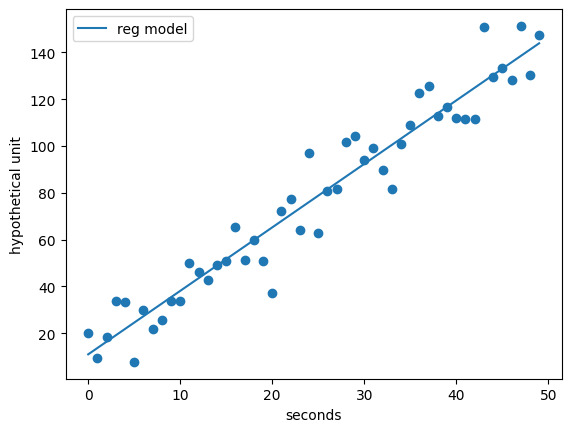

In [ ]:
plt.scatter(x, y_true)
plt.plot(x, ypred,label='reg model')
plt.xlabel('seconds')
plt.ylabel('hypothetical unit')
plt.legend();

Ok, ok not bad. Now we are going to evaluate our model using the $R^2$ score like we discussed today.

## 1.3 Evaluating the model

Let's use the "goodness of fit" $R^2$ score

In [ ]:
### Let's get the r-square score from our results.
metrics.r2_score(y_true, ypred)

0.9333339494078722

## 1.4 $\textbf{IF}$ this were a ML problem,
we would want to run cross-validation in order to get an estimate of how much the scores fluctuate due to variation in the data.

Let's cross-validate using a K-fold of our data like we learned today in order to better evaluate the model.
The built-in cross_validation metric is also the R-square score.

In [ ]:
#let's create a cross-validation generator that splits the data into a 5-kfold
### LET'S DESCRIBE THE SYNTAX TOGETHER
cross_v = KFold(n_splits = 5 , shuffle = True , random_state = 10)

In [ ]:
# create a variable that stores the output of the 5-kfold cross-validation
### THIS IS A NEW OUTPUT TYPE!!
scores = cross_validate(model_1, x_2, y_true, cv=cross_v, return_train_score = True)
scores

{'fit_time': array([0.00163603, 0.00112534, 0.00110006, 0.00730109, 0.00137138]),
 'score_time': array([0.00097203, 0.00075269, 0.00076652, 0.00171542, 0.00107765]),
 'test_score': array([0.91667128, 0.97991924, 0.94992798, 0.8317535 , 0.91479066]),
 'train_score': array([0.93880925, 0.92671114, 0.92456214, 0.94508019, 0.93707324])}

We see from the output above that it's enclosed in {} and has 'keys': this is output is an object called a dictionary. We get rows out of a dictionary like so:

In [ ]:
### LET'S DESCRIBE THE SYNTAX TOGETHER
test_sc = scores['test_score']
train_sc = scores['train_score']

let's look at the mean and standard deviation of our scores

In [ ]:
print('Mean test scores:', test_sc.mean(), test_sc.std())
print('Mean train scores:', train_sc.mean(), train_sc.std())

Would this be a good ML dataset? What's the evidence for your decision?

Does our model suffer from high variance or high bias?

# $\underline{{\rm Exercise A.}}$
We perform a lot of these steps several times and it's often more efficient to write a function.

Write a function called "scores_cross_val" that:
- performs the cross validation,
- prints the mean and standard deviation of the test scores and the training scores,
- and returns the test scores and training scores arrays in case you need them
- the function should take the model, the predictor variable, the target variable and the cross validation generator as arguments

# $\underline{{\rm Exercise\ B.}}$
Peform the linear regression on the Hubble data from yesterday and compare to your best model from yesterday! Would you want to do cross-validation? Why or why not?

Be sure to:
- define your model
- fit the model with the Hubble data (which variable is the predictor and which variable is the response variable?) Don't forget to reshape your predictor variable!
- plot, the Hubble data, your best model from yesterday and the regression model from now!
- make a second plot showing the residuals from both models!
- evaluate the models with metrics.r2_score(). for you model from today and the one from yesterday to compare.
How well did the regression algorithm do?

In [ ]:
scores_cross_val(model_hub, dist_2, vel, cv)

# 2 $\underline{{\rm ML\ linear\ regression}}$

## 2.1 Add  points to our toy model and visualize

Let's start by adding 100 points to our data from the toy model in Section 1.

In [ ]:
np.random.seed(0)

x_toy = np.arange(150)

#notice that we want some larger scatter here,
#the more points we have, the larger we need to scale the random values
y_true_toy = 2.5+x_toy*3 + 150/5*np.random.randn(150)

In [ ]:
plt.scatter(x_toy, y_true_toy)
plt.xlabel('seconds')
plt.ylabel('hypothetical unit')

In [ ]:
## It's often useful to look at a histogram of your data to see if you have balanced data
plt.hist(y_true_toy, bins=50);

## 2.2 Typical splitting of the data into a training set and a testing test

Let's first perform the typical splitting of the data into a training set and a testing test. We will evaluate the results directly with the metrics.r2_score(). And then do cross validation to see if this agrees with the results.

Split the data into 80% train and 20% test.

In [ ]:
### Let's describe the SYNTAX TOGETHER
### this function is great becasue it shiffles the dtat for you!
### dOn't forget to reshape your predictor data!
X_train, X_test, y_train, y_test = train_test_split(
    x_toy.reshape(-1,1), y_true_toy, test_size=0.20, random_state=0)

In [ ]:
## we look at the span of ourtraining and test set to make sure the cover the same region
## We expect more frequncy of data in the training set (because it has 80% of the data)
## But we want to make sure that our train and test set span the same range of target value
plt.hist(y_train, alpha=0.5, label='y_train')
plt.hist(y_test, alpha=0.5, label='y_test')
plt.xlabel('target variable')
plt.legend();

What do we notice about these distributions?

In [ ]:
## Now we define our model

model_2 = LinearRegression()

In [ ]:
### we fit our training data
model_2.fit(X_train, y_train)

In [ ]:
#create a variable that stores the algorithm prediction!
ypred_toy = model_2.predict(X_test)

In [ ]:
#get the r2 score
# what are we passing here?
metrics.r2_score(y_test, ypred_toy)

In [ ]:
#lets cross validate
scores_cross_val(model_2, x_toy.reshape(-1,1), y_true_toy, cv)

How does our score compare to the model in section 1?

In [ ]:
slope_toy     = model_2.coef_
intercept_toy = model_2.intercept_

print(slope_toy, intercept_toy)

In [ ]:
model_toy = intercept_toy + slope_toy*x_toy
plt.scatter(x_toy, y_true_toy)
plt.plot(x_toy, model_toy)
plt.xlabel('seconds')
plt.ylabel('hypothetical unit')

Let's make a residual plot of the test set

In [ ]:
resids_toy = ypred_toy-y_test
plt.scatter(X_test, resids_toy, label='test set, ML')
plt.hlines(y=0, xmin=0, xmax=140, linestyle=':')
plt.legend();

# $\underline{{\rm Exercise\ C.}}$
Load the Cepheid.csv file. This file contains two columns of information about Type 1 Cephieid variable stars.

-the first column contains the period of the star in units of [days]

-the second column contains the luminosity of the cepheid in units of [$L_{\odot}$]

i. make two arrays, one to hold the period and another to hold the velocities

ii. these values are in log scale so you will have to take the np.log10() of both columns

iii. plot the cepheids with luminosity on the y-axis and period on the x-axis. After transofrming your values to log10, the scatter plot should appear linear

## Do the ML regression!

iv. split the cephieds into am 80/20 train test split and perfom the linear regression on the training set!

v. predict on the test set.

vi. obtain the slope and intercept from the regression model

vii. plot the regression model over the scatter plot of the variable cepheids.